In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

## Análisis y exploración de datos

In [34]:
remuneraciones = pd.read_csv('Remuneraciones.csv', header=0, skiprows=[1])

In [35]:
# Vista general del dataset
print(remuneraciones.head())

  Periodo                Industria   Genero  Valor
0  feb-96  agricultura y ganaderia  Mujeres  406.8
1  mar-96  agricultura y ganaderia  Mujeres  399.7
2  abr-96  agricultura y ganaderia  Mujeres  375.9
3  may-96  agricultura y ganaderia  Mujeres  395.6
4  jun-96  agricultura y ganaderia  Mujeres  554.0


In [36]:
# Asigna nombres de columna
remuneraciones.columns = ['Periodo', 'Industria', 'Genero', 'Valor']
# Comprueba que ya existan los nombres
print(remuneraciones.columns)

Index(['Periodo', 'Industria', 'Genero', 'Valor'], dtype='object')


In [37]:
remuneraciones.isnull().sum()

Periodo      0
Industria    0
Genero       0
Valor        0
dtype: int64

In [42]:
print(remuneraciones['Genero'].unique())

['Mujeres' 'Varones']


## Procesamiento y transformación de datos

In [43]:
# Convertir texto a número
remuneraciones['Genero'] = remuneraciones['Genero'].map({'Varones': 0, 'Mujeres': 1})

In [44]:
#Codificar variable categorica
le = LabelEncoder()
remuneraciones['Industria'] = le.fit_transform(remuneraciones['Industria'])

In [45]:
#Separar X e y
X = remuneraciones[['Genero', 'Industria']]
y = remuneraciones['Valor']

In [46]:
#Division del modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
# Etapa de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Prediccion y evaluacion
y_pred = model.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', model.score(X_test, y_test))


MSE: 2563052594.4186635
R²: 0.0011835858636577434


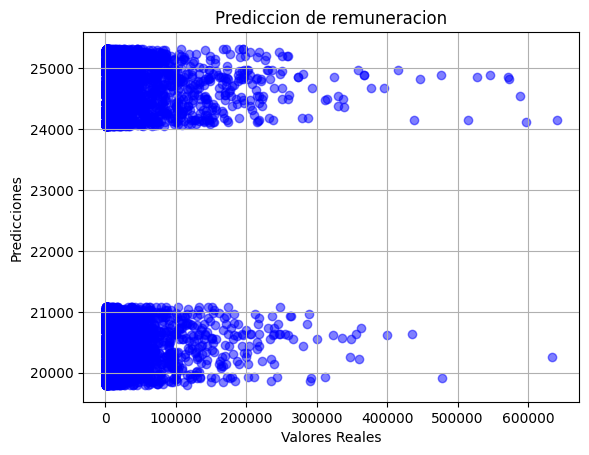

In [53]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Prediccion de remuneracion')
plt.grid(True)
plt.show()